In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv(r'C:\Users\Shreyansh Singh\Desktop\ML3\data\data.csv')

In [3]:
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


<Axes: >

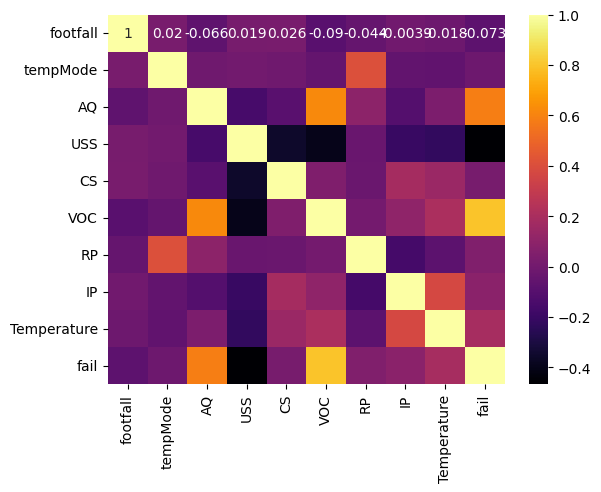

In [6]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr , annot=True , cmap='inferno')

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
x = df.drop(columns='fail')
y = df['fail']
preproccessing_pipeline = Pipeline(steps= [
    ('scaler', StandardScaler())
])
display(preproccessing_pipeline)

model_pipeline = Pipeline(steps = [
    ('model', RandomForestClassifier())
])
display(model_pipeline)
pipeline = Pipeline(steps = [
    ('preprocessing', preproccessing_pipeline),
    ('modeling', model_pipeline)
])
display(pipeline)

Pipeline(steps=[('scaler', StandardScaler())])

Pipeline(steps=[('model', RandomForestClassifier())])

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('modeling',
                 Pipeline(steps=[('model', RandomForestClassifier())]))])

In [11]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)
model = pipeline.fit(x_train , y_train)
prediction = pipeline.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test , prediction))

0.8783068783068783
